# Packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Importation des données

In [2]:
df = pd.read_csv("2025-08-MD.csv")

In [3]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


We have 127 variables. We need to verify if the date est de 1959 to 2025 par ordre de mensualité. After that, let's check if our interested variables are on the dataset. 

# 2. Verify the frequence and the date of time series

In [4]:
# Drop the row of transform
df = df.iloc[2:].reset_index(drop=True)
print(df.head())

    sasdate       RPI  W875RX1  DPCERA3M086SBEA    CMRMTSPLx      RETAILx  \
0  2/1/1959  2593.596   2434.8           15.346  278713.9773  17819.01912   
1  3/1/1959  2610.396   2452.7           15.491  277775.2539  17967.91336   
2  4/1/1959  2627.446   2470.0           15.435  283362.7075  17978.97983   
3  5/1/1959  2642.720   2486.4           15.622  285307.2201  18119.82573   
4  6/1/1959  2650.841   2493.9           15.679  285279.5930  18284.81665   

    INDPRO  IPFPNSS  IPFINAL  IPCONGD  ...  DNDGRG3M086SBEA  DSERRG3M086SBEA  \
0  22.3917  23.7024  22.4549  31.8987  ...           18.302           10.167   
1  22.7142  23.8459  22.5651  31.8987  ...           18.289           10.185   
2  23.1981  24.1903  22.8957  32.4019  ...           18.300           10.221   
3  23.5476  24.3911  23.1161  32.5567  ...           18.280           10.238   
4  23.5744  24.5633  23.2814  32.4019  ...           18.321           10.275   

   CES0600000008  CES2000000008  CES3000000008  UMCSENTx

In [5]:
# Let us make the date as index
df.sasdate
df.sasdate = pd.to_datetime(df.sasdate)
df = df.set_index(df.sasdate)
df = df.drop("sasdate", axis=1)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-02-01,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18119.82573,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN
1959-06-01,2650.841,2493.9,15.679,285279.5930,18284.81665,23.5744,24.5633,23.2814,32.4019,20.0937,...,18.321,10.275,2.17,2.50,2.09,NaN,6956.0,12926.0,78.6972,NaN


In [6]:
# Beginning and the end of the time series
print(df.index[0])
print(df.index[-1])

1959-02-01 00:00:00
2025-07-01 00:00:00


We observe that the dataset is vary 1959 to 2025. We normaly find the frequence of quaterly.

In [7]:
pd.infer_freq(df.index)

'MS'

The quarterly periods starting in December. 

# Les variables à retenir

In [8]:
col_names = ["UNRATE", 
             # Unemployement
              "TB3MS", # 3-month treasury bill
                "RPI", # Industrial personal income
                "INDPRO", # Industrial production
                "DPCERA3M086SBEA", # Consumption
                "S&P 500", # S&P 500
                "BUSLOANS", # BUSLOANS
                "CPIAUCSL", # CPIAUCSL
                "OILPRICEx", # OILPRICEx
                "M2SL"] # M2SL

df = df[col_names]

In [9]:
print(df.columns.tolist())

['UNRATE', 'TB3MS', 'RPI', 'INDPRO', 'DPCERA3M086SBEA', 'S&P 500', 'BUSLOANS', 'CPIAUCSL', 'OILPRICEx', 'M2SL']


In [10]:
df.head()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
sasdate,,,,,,,,,,
1959-02-01,5.9,2.70,2593.596,22.3917,15.346,54.77,35.2201,29.00,3.00,287.7
1959-03-01,5.6,2.80,2610.396,22.7142,15.491,56.16,35.1304,28.97,2.97,289.2
1959-04-01,5.2,2.95,2627.446,23.1981,15.435,57.10,35.5581,28.98,2.97,290.1
1959-05-01,5.1,2.84,2642.720,23.5476,15.622,57.96,36.3064,29.04,2.97,292.2
1959-06-01,5.0,3.21,2650.841,23.5744,15.679,57.46,37.1404,29.11,2.97,294.1


# Let's have a look of indicators

In [11]:
df.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,5.865789,4.363722,9675.545741,68.057303,57.326596,1000.921516,873.255470,140.626298,33.482321,5580.911905
std,1.686784,3.111710,5139.657856,26.912013,31.171668,1284.540011,808.507341,84.966376,29.751059,5944.125979
min,3.400000,0.010000,2593.596000,22.042200,15.346000,53.730000,35.130400,28.970000,2.920000,287.700000
25%,4.600000,2.122500,5161.658500,45.096325,29.182500,101.225000,183.431700,54.675000,11.160000,993.075000
50%,5.600000,4.470000,8501.858000,63.023350,49.381500,412.530000,621.503200,139.550000,22.292500,3398.700000
75%,6.900000,5.825000,13789.318750,95.919900,84.408250,1331.365000,1244.484825,214.530000,51.530000,8160.575000
max,14.800000,16.300000,22850.332000,104.113700,123.458000,6296.500000,3034.312600,322.132000,133.930000,22115.400000


- UNRATE: Civilian unemployment rate, percent of labor force.
- TB3MS: 3-Month Treasury Bill Rate, percent per annum (yield).
- RPI: Real Personal Income, billions of chained 2012 U.S. dollars (SAAR).
- INDPRO: Industrial Production Index, index (2017 = 100).
- DPCERA3M086SBEA: Real Personal Consumption Expenditures, billions of chained 2012 U.S. dollars (SAAR).
- S&P 500: Standard & Poor’s 500 Index, index level (price index, no dividends).
- BUSLOANS: Commercial and Industrial Loans, billions of U.S. dollars.
- CPIAUCSL: Consumer Price Index for All Urban Consumers, index (1982–84 = 100).
- OILPRICEx: Crude Oil, West Texas Intermediate (WTI), U.S. dollars per barrel.
- M2SL: M2 Money Stock, billions of U.S. dollars.

# NA

In [12]:
print(f"Number of missing values : {df.isna().sum().sum()}")

Number of missing values : 0


# Plot Time Series

<Axes: xlabel='sasdate'>

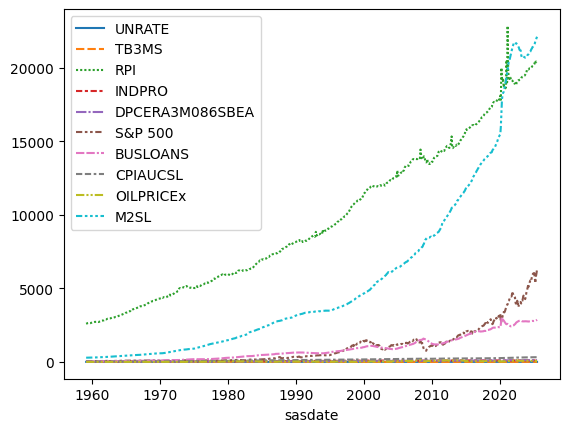

In [13]:
# Plot every time series
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.lineplot(df)

We cannot see the evolution of some Time Series.

In [14]:
# --- 2) Passer en format long
df_long = (
    df.reset_index()
      .melt(id_vars="sasdate", var_name="series", value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "sasdate"])
)

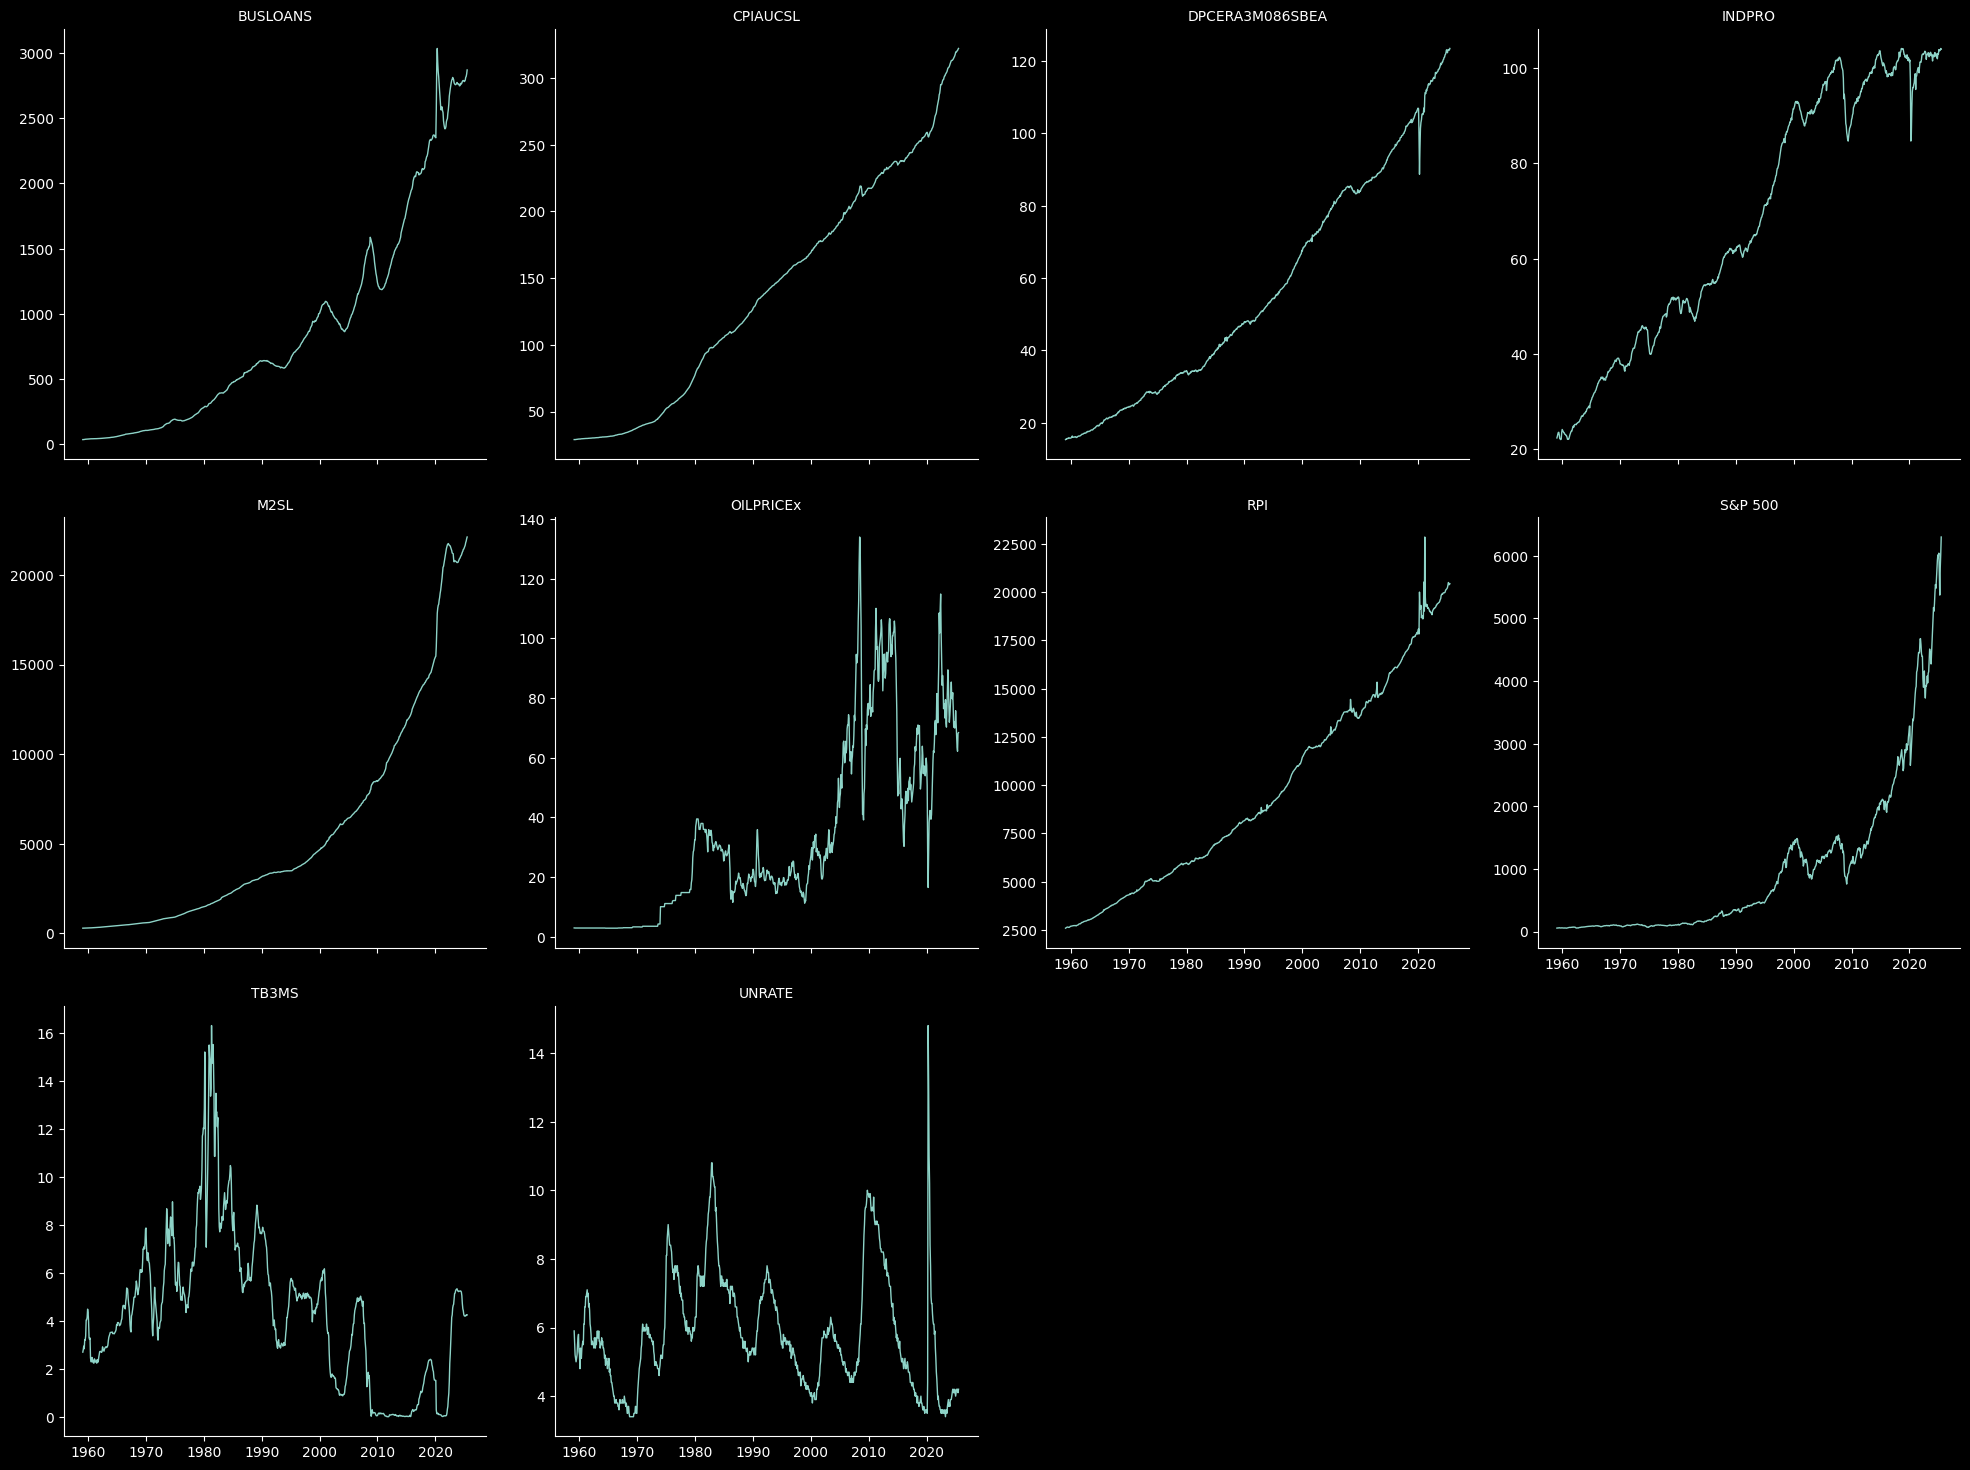

In [15]:
plt.style.use("dark_background")

g = sns.relplot(
    data=df_long,
    x="sasdate", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False) 

plt.show()

Vu que le taux de chômage et le monthly treasure bill rate sont en pourcentage, ils sont très proche de l'état stationnaire (moyenne = 0  et variance stable). Le monthly treasure bill est un peu volatile. La variance commence à bouger sur l'OIL price tandis que la tendance à la hausse est la règle pour le reste. En clair, il faut analyser la stationnarité des données.

# Stationnarité et son origine

In [16]:
# === 1. Test ADF (tau3) : racine unitaire ===
def test_adf_trend(series, autolag="AIC"):
    y = pd.Series(series).dropna()
    adf_res = adfuller(y, regression="ct", autolag=autolag)
    return {
        "adf_stat": adf_res[0],
        "adf_pval": adf_res[1],
        "usedlag": adf_res[2]
    }

In [17]:
# === 2. Estimation du Modèle 1 : Δy_t = c + β1 t + γ y_{t-1} + ... ===
def estimate_model1(series, lags):
    y = pd.Series(series).dropna()
    dy = y.diff()
    y_lag = y.shift(1)
    trend = np.arange(1, len(y) + 1)

    X = pd.DataFrame({
        "const": 1.0,
        "trend": trend,
        "y_lag": y_lag
    }, index=y.index)

    # Ajouter les retards de Δy
    for i in range(1, lags + 1):
        X[f"dy_lag{i}"] = dy.shift(i)

    df_model = pd.concat([dy, X], axis=1).dropna()
    dy_aligned = df_model.iloc[:, 0]
    X_aligned = df_model.iloc[:, 1:]

    ols_res = sm.OLS(dy_aligned, X_aligned).fit()
    return ols_res

In [18]:
# === 3. Test de Fisher (φ2) : H0 : c = β1 = γ = 0 ===
def test_fisher_phi2(ols_res):
    f_test = ols_res.f_test("const = 0, trend = 0, y_lag = 0")
    return {"phi2_F": float(f_test.fvalue), "phi2_pval": float(f_test.pvalue)}

In [20]:
ALPHA = 0.05
# === 4. Décision finale ===
def analyse_series(series, name, alpha=ALPHA):
    adf_out = test_adf_trend(series)
    ols_res = estimate_model1(series, adf_out["usedlag"])
    results = {
        "ADF stat (tau3)": adf_out["adf_stat"],
        "ADF p-value": adf_out["adf_pval"],
        "lags used": adf_out["usedlag"],
        "beta1": ols_res.params.get("trend", np.nan),
        "beta1 p-value": ols_res.pvalues.get("trend", np.nan)
    }

    # Cas 1 : pas de racine unitaire
    if adf_out["adf_pval"] < alpha:
        if results["beta1 p-value"] < alpha:
            results["Conclusion"] = "Stationnaire autour d’une tendance (TS)"
        else:
            results["Conclusion"] = "Stationnaire sans tendance significative"
        return results

    # Cas 2 : racine unitaire (non stationnaire)
    else:
        fisher_out = test_fisher_phi2(ols_res)
        results.update(fisher_out)
        if fisher_out["phi2_pval"] < alpha:
            results["Conclusion"] = "Δy_t est TS, donc y_t est I(1)"
        else:
            results["Conclusion"] = "y_t est une marche aléatoire pure (RW)"
        return results

In [24]:
# === 5. Application à tout un DataFrame ===
def analyse_dataframe(df):
    rows = {}
    for col in df.columns:
        rows[col] = analyse_series(df[col], col)
    return pd.DataFrame(rows).T

In [27]:
summary = analyse_dataframe(df)

print("\n=== Résumé des tests Modèle 1 ===")
print(summary[
    ["ADF stat (tau3)", "ADF p-value", "beta1", "beta1 p-value",
     "phi2_F", "phi2_pval", "Conclusion"]
])


=== Résumé des tests Modèle 1 ===
                ADF stat (tau3) ADF p-value     beta1 beta1 p-value  \
UNRATE                -3.436506    0.046698 -0.000032      0.621638   
TB3MS                 -3.055678    0.117174 -0.000128      0.051844   
RPI                   -0.660632    0.975611  0.190731      0.238662   
INDPRO                -2.321064    0.422336  0.001192      0.030951   
DPCERA3M086SBEA       -0.649434    0.976267  0.000702      0.211532   
S&P 500                3.844662         1.0 -0.010988      0.499313   
BUSLOANS              -0.451398    0.985222  0.008686      0.144569   
CPIAUCSL              -1.803379    0.703127  0.001066      0.035822   
OILPRICEx             -3.427869    0.047774  0.002768      0.003911   
M2SL                    0.68979    0.997029  0.016511       0.22426   

                    phi2_F phi2_pval                                Conclusion  
UNRATE                 NaN       NaN  Stationnaire sans tendance significative  
TB3MS             3.1

## Analyse de la stationnarité : 
On comprend mieux maintenant nos données. Le taux de chômage est stationnaire à niveau. C'est normal puisque c'est un taux. Le reste ne sont pas stationnaires.
Presque toutes les séries sont stationnaires avec une différenciation 1. Seul le prix du baril du pétrol qui est stationnaire autour d'une tendance.

## Que faire ? 
- Notre objectif est de prédire et d'expliquer le taux de croissance du chômage avec celui des autres variables. Ainsi, nous allons donc 
- différencier le taux de chômage pour avoir une croissance. C'est aussi le cas pour TB3MS.
- Pour les autres variables, nous allons utiliser un log différence. 

# Stationnariser les taux

In [45]:
# ---------- Transformations ----------
def diff_simple(series, lags=1):
    """Δx_t = x_t - x_{t-l}"""
    return pd.Series(series).diff(lags)

# ---------- Test ADF (constante + tendance) ----------
def adf_test_ct(series, alpha=ALPHA):
    y = pd.Series(series).dropna()
    if len(y) < 20:
        return {"ok": False, "reason": "insufficient_data"}
    stat, pval, usedlag, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
    return {"ok": True, "stat": stat, "pval": pval, "lags": usedlag, "stationary": (pval < alpha)}

In [47]:
ALPHA = 0.05   # seuil
LAGS_DIFF = 1 

# ---------- 1) Créer le DataFrame des taux transformés ----------
rate_cols = [c for c in ["UNRATE", "TB3MS"] if c in df.columns]
df_rates_trans = pd.DataFrame(index=df.index)

for col in rate_cols:
    df_rates_trans[col] = diff_simple(df[col], lags=LAGS_DIFF)

# Option : aligner sur les observations disponibles
df_rates_trans = df_rates_trans.dropna()

In [48]:
# ---------- 2) Résumé ADF pour les taux transformés ----------
rows = []
for col in df_rates_trans.columns:
    res = adf_test_ct(df_rates_trans[col], alpha=ALPHA)
    if res["ok"]:
        verdict = "Stationary" if res["stationary"] else "Non-stationary"
        rows.append({
            "series": col, "ADF stat": res["stat"], "p-value": res["pval"],
            "lags": res["lags"], "verdict": verdict
        })
    else:
        rows.append({"series": col, "ADF stat": np.nan, "p-value": np.nan,
                     "lags": np.nan, "verdict": res["reason"]})

summary_rates = pd.DataFrame(rows).set_index("series").sort_index()

print("\n=== Nouveau DataFrame des taux (différenciés) ===")
print(df_rates_trans.head())

print("\n=== Résumé ADF sur Δtaux ===")
print(summary_rates)


=== Nouveau DataFrame des taux (différenciés) ===
            UNRATE  TB3MS
sasdate                  
1959-03-01    -0.3   0.10
1959-04-01    -0.4   0.15
1959-05-01    -0.1  -0.11
1959-06-01    -0.1   0.37
1959-07-01     0.1  -0.01

=== Résumé ADF sur Δtaux ===
         ADF stat       p-value  lags     verdict
series                                           
TB3MS   -6.442657  2.464694e-07    19  Stationary
UNRATE -15.516320  1.377171e-22     3  Stationary


# Stationnariser les autres variables

In [53]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

ALPHA = 0.05
LAGS_DIFF = 1  # 1 = m/m ; mettre 12 pour y/y si besoin

# ---------- Transformations ----------
def diff_simple(series, lags=1):
    return pd.Series(series).diff(lags)

def log_diff(series, lags=1):
    s = pd.Series(series).astype(float)
    s = s.where(s > 0)
    return np.log(s).diff(lags)

def log_diff2(series, lags=1):
    s = pd.Series(series).astype(float)
    s = s.where(s > 0)
    return np.log(s).diff(lags).diff(lags)

# ---------- Test ADF (constante + tendance) ----------
def adf_test_ct(series, alpha=ALPHA):
    y = pd.Series(series).dropna()
    if len(y) < 20:
        return {"ok": False, "reason": "insufficient_data"}
    stat, pval, usedlag, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
    return {"ok": True, "stat": stat, "pval": pval, "lags": usedlag, "stationary": (pval < alpha)}

# ---------- 1) Taux : Δ (ordre 1) ----------
rate_cols = [c for c in ["UNRATE", "TB3MS"] if c in df.columns]

df_rates_trans = pd.DataFrame(index=df.index)
summary_rates = []

for col in rate_cols:
    y_t = diff_simple(df[col], lags=LAGS_DIFF)     # Δ -> ordre 1
    df_rates_trans[col] = y_t
    res = adf_test_ct(y_t, alpha=ALPHA)
    if res["ok"]:
        summary_rates.append({
            "series": col, "method": "Δ", "order": 1,
            "ADF stat": res["stat"], "p-value": res["pval"], "lags": res["lags"],
            "verdict": "Stationary" if res["stationary"] else "Non-stationary"
        })
    else:
        summary_rates.append({"series": col, "method": "Δ", "order": 1,
                              "ADF stat": np.nan, "p-value": np.nan, "lags": np.nan,
                              "verdict": res["reason"]})

df_rates_trans = df_rates_trans.dropna()
summary_rates = pd.DataFrame(summary_rates).set_index("series").sort_index()

# ---------- 2) Niveaux positifs : Δlog (ordre 1) puis Δ²log (ordre 2 si besoin) ----------
log1_cols = ["RPI", "INDPRO", "DPCERA3M086SBEA", "S&P 500", "BUSLOANS", "CPIAUCSL", "OILPRICEx", "M2SL"]
log1_cols = [c for c in log1_cols if c in df.columns]

df_log_trans = pd.DataFrame(index=df.index)
summary_log = []

for col in log1_cols:
    # Essai Δlog (ordre 1)
    y1 = log_diff(df[col], lags=LAGS_DIFF)
    r1 = adf_test_ct(y1, alpha=ALPHA)

    if r1["ok"] and r1["stationary"]:
        df_log_trans[col] = y1
        summary_log.append({
            "series": col, "method": "Δlog", "order": 1,
            "ADF stat": r1["stat"], "p-value": r1["pval"], "lags": r1["lags"],
            "verdict": "Stationary"
        })
        continue

    # Sinon, essai Δ²log (ordre 2)
    y2 = log_diff2(df[col], lags=LAGS_DIFF)
    r2 = adf_test_ct(y2, alpha=ALPHA)

    df_log_trans[col] = y2  # on garde le plus fort niveau de diff tenté
    if r2["ok"]:
        summary_log.append({
            "series": col, "method": "Δ²log", "order": 2,
            "ADF stat": r2["stat"], "p-value": r2["pval"], "lags": r2["lags"],
            "verdict": "Stationary" if r2["stationary"] else "Non-stationary"
        })
    else:
        summary_log.append({
            "series": col, "method": "Δ²log", "order": 2,
            "ADF stat": np.nan, "p-value": np.nan, "lags": np.nan,
            "verdict": r2["reason"]
        })

df_log_trans = df_log_trans.dropna()
summary_log = pd.DataFrame(summary_log).set_index("series").sort_index()

In [56]:
# ---------- 3) Fusion : DataFrame global stationnaire + résumé ----------
df_stationary = pd.concat([df_rates_trans, df_log_trans], axis=1)
summary_all = pd.concat([summary_rates, summary_log]).sort_index()

In [57]:
summary_all

,method,order,ADF stat,p-value,lags,verdict
series,,,,,,
BUSLOANS,Δlog,1,-8.183717,2.687827e-11,4,Stationary
CPIAUCSL,Δ²log,2,-11.560177,2.111999e-18,13,Stationary
DPCERA3M086SBEA,Δlog,1,-15.489395,1.401828e-22,4,Stationary
INDPRO,Δlog,1,-7.574740,6.857446e-10,10,Stationary
M2SL,Δlog,1,-5.640587,1.207784e-05,8,Stationary
OILPRICEx,Δlog,1,-15.081641,1.997805e-22,3,Stationary
RPI,Δlog,1,-7.088174,8.917828e-09,19,Stationary
S&P 500,Δlog,1,-11.170067,1.066672e-17,5,Stationary
TB3MS,Δ,1,-6.442657,2.464694e-07,19,Stationary


# Présenter graphiquement les séries temporelles stationnaires

In [61]:
import pandas as pd

# 1) s'assurer que l'index est bien nommé/typé
df_stationary = df_stationary.copy()
df_stationary.index.name = "sasdate"
df_stationary.index = pd.to_datetime(df_stationary.index)

# 2) passage en format long
df_long = (
    df_stationary
      .reset_index()                           # sasdate -> colonne
      .melt(id_vars="sasdate",
            var_name="series",
            value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "sasdate"])
      .reset_index(drop=True)
)

# 3) ajouter method/order si tu as déjà 'summary_all'
if "summary_all" in globals():
    meta = summary_all[["method", "order"]].reset_index()  # 'series' en index dans summary_all
    df_long = df_long.merge(meta, on="series", how="left")

print(df_long.head())

     sasdate    series     value method  order
0 1959-04-01  BUSLOANS  0.012101   Δlog      1
1 1959-05-01  BUSLOANS  0.020826   Δlog      1
2 1959-06-01  BUSLOANS  0.022711   Δlog      1
3 1959-07-01  BUSLOANS  0.014013   Δlog      1
4 1959-08-01  BUSLOANS  0.011208   Δlog      1


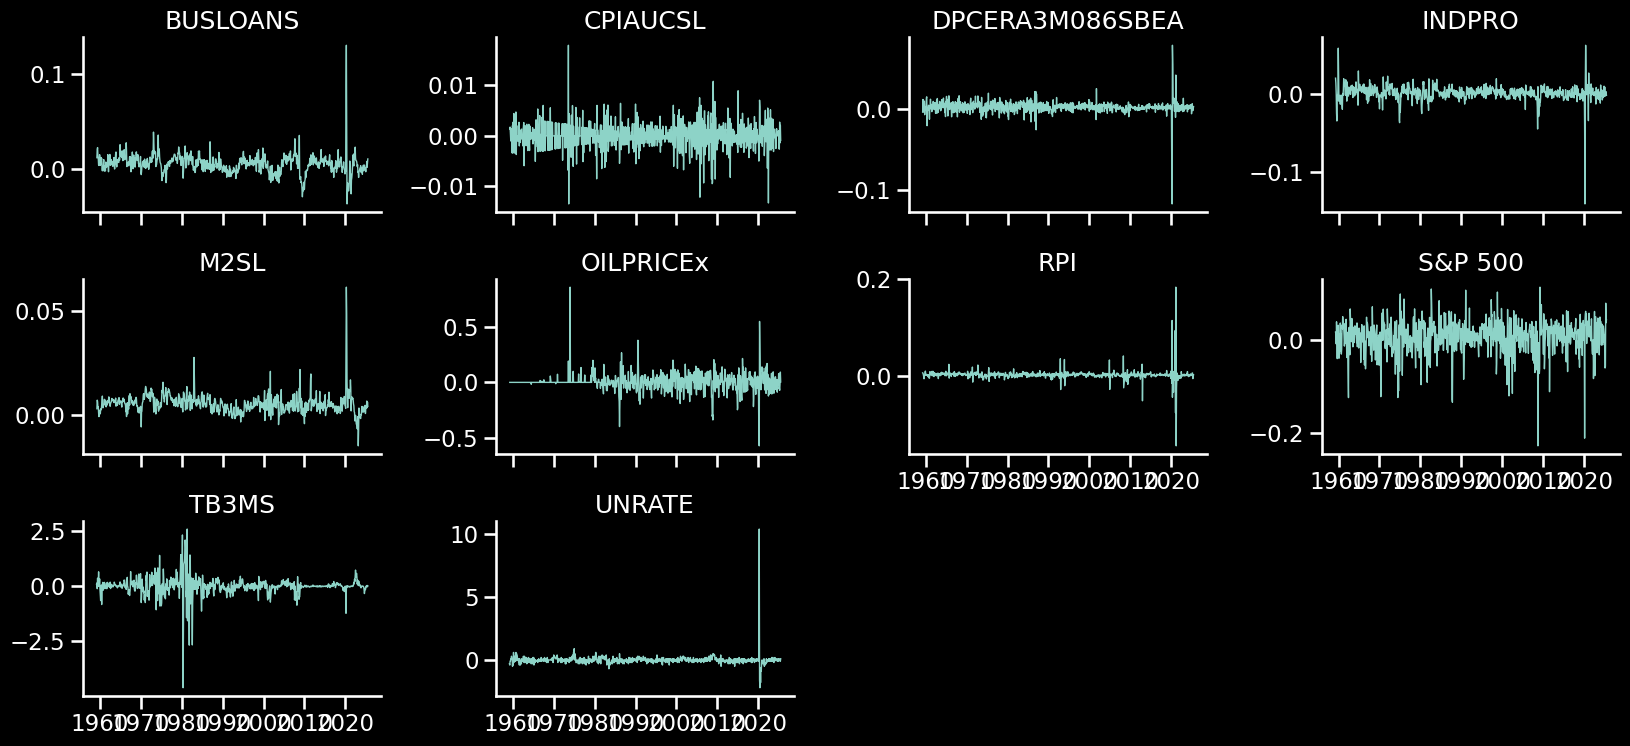

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# s'assurer de l'ordre et du type de date
df_long = df_long.sort_values(["series", "sasdate"]).copy()
df_long["sasdate"] = pd.to_datetime(df_long["sasdate"])

plt.style.use("dark_background")
sns.set_context("talk")

g = sns.relplot(
    data=df_long,
    x="sasdate", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False,
    height=2.6, aspect=1.6
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

# Formatage des dates pour plus de lisibilité en fond sombre
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False)

plt.tight_layout()
plt.show()